In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns

In [2]:
from dishpylib.pyanalysis import tee_plot

# get data

In [3]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/stage=8+what=elaborated/',
)

In [4]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

'581a93929506b064'

In [5]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

# how do robustness (fraction deleterious) and mutation accumulation relate?

outplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Fraction Mutations that are Deleterious', ylabel='Mutation Accumulation'>

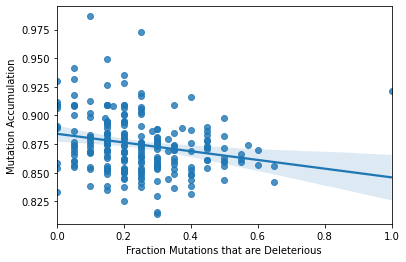

In [6]:
tee_plot(
    sns.regplot,
    data=df,
    x='Fraction Mutations that are Deleterious',
    y='Mutation Accumulation',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.png


(0.09853048676802673, 0.5506690160832141)

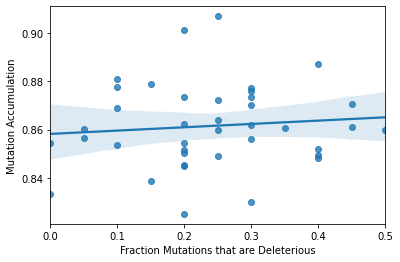

In [7]:
tee_plot(
    sns.regplot,
    data=df40,
    x='Fraction Mutations that are Deleterious',
    y='Mutation Accumulation',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

stats.pearsonr(
    df40['Fraction Mutations that are Deleterious'],
    df40['Mutation Accumulation'],
)

outplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.png


(-0.09589425334386191, 0.5561189599621202)

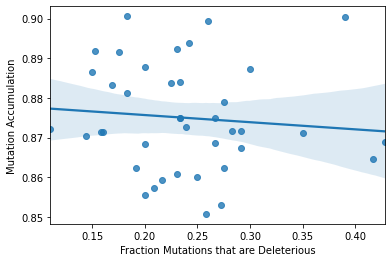

In [8]:
groupby_Series_mean_df = df.groupby('Series').mean()
tee_plot(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fraction Mutations that are Deleterious',
    y='Mutation Accumulation',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Fraction Mutations that are Deleterious'].mean(),
    df.groupby('Series')['Mutation Accumulation'].mean(),
)

# how do robustness (mean differential) and mutation accumulation relate?

outplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Mean Mutant Fitness Differential', ylabel='Mutation Accumulation'>

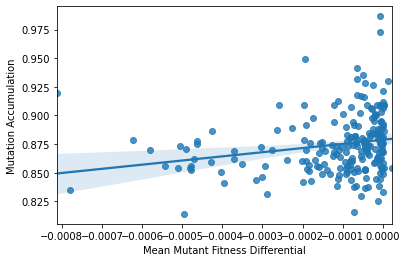

In [9]:
tee_plot(
    sns.regplot,
    data=df,
    x='Mean Mutant Fitness Differential',
    y='Mutation Accumulation',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.png


(-0.0030978843493690536, 0.9850669765622868)

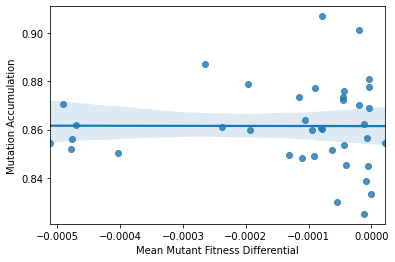

In [10]:
tee_plot(
    sns.regplot,
    data=df40,
    x='Mean Mutant Fitness Differential',
    y='Mutation Accumulation',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

stats.pearsonr(
    df40['Mean Mutant Fitness Differential'],
    df40['Mutation Accumulation'],
)

outplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.png


(0.5098855856441594, 0.0007770062454457548)

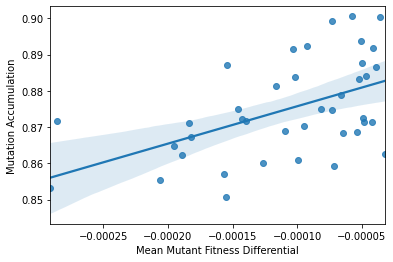

In [11]:
groupby_Series_mean_df = df.groupby('Series').mean()
tee_plot(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Mean Mutant Fitness Differential',
    y='Mutation Accumulation',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Mean Mutant Fitness Differential'].mean(),
    df.groupby('Series')['Mutation Accumulation'].mean(),
)

# how do robustness (mutaing mutant differential) and mutation accumulation relate?

outplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Mean Mutating Mutant Fitness Differential', ylabel='Mutation Accumulation'>

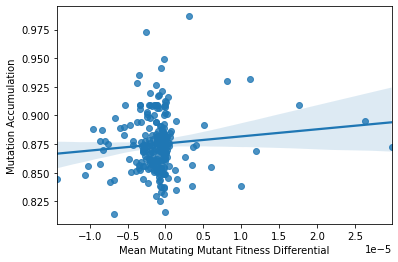

In [12]:
tee_plot(
    sns.regplot,
    data=df,
    x='Mean Mutating Mutant Fitness Differential',
    y='Mutation Accumulation',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.png


(-0.07502256697989106, 0.649891426565855)

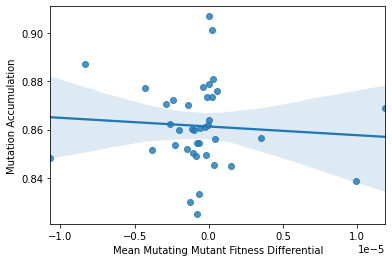

In [13]:
tee_plot(
    sns.regplot,
    data=df40,
    x='Mean Mutating Mutant Fitness Differential',
    y='Mutation Accumulation',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

stats.pearsonr(
    df40['Mean Mutating Mutant Fitness Differential'],
    df40['Mutation Accumulation'],
)

outplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.png


(0.011335712174815714, 0.9446536414162388)

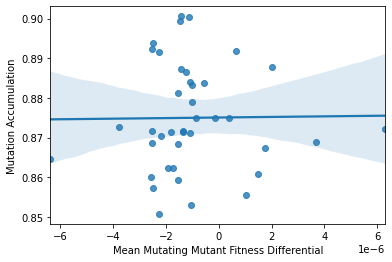

In [14]:
groupby_Series_mean_df = df.groupby('Series').mean()
tee_plot(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Mean Mutating Mutant Fitness Differential',
    y='Mutation Accumulation',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Mean Mutating Mutant Fitness Differential'].mean(),
    df.groupby('Series')['Mutation Accumulation'].mean(),
)

# how do robustness (frac deleterious mutaing mutant) and mutation accumulation relate?

outplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Fraction Mutating Mutations that are Deleterious', ylabel='Mutation Accumulation'>

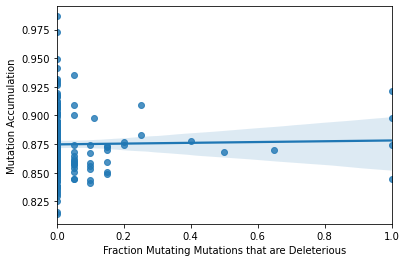

In [15]:
tee_plot(
    sns.regplot,
    data=df,
    x='Fraction Mutating Mutations that are Deleterious',
    y='Mutation Accumulation',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.png


(0.13677405535844428, 0.40638293866073916)

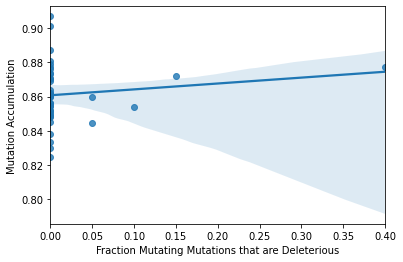

In [16]:
tee_plot(
    sns.regplot,
    data=df40,
    x='Fraction Mutating Mutations that are Deleterious',
    y='Mutation Accumulation',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

stats.pearsonr(
    df40['Fraction Mutating Mutations that are Deleterious'],
    df40['Mutation Accumulation'],
)

outplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=581a93929506b064+ext=.png


(0.30134766781137196, 0.05880552231091611)

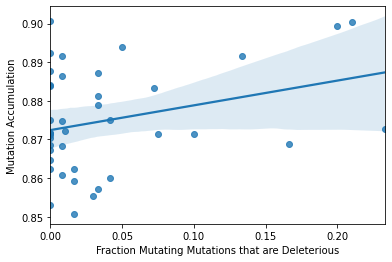

In [17]:
groupby_Series_mean_df = df.groupby('Series').mean()
tee_plot(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fraction Mutating Mutations that are Deleterious',
    y='Mutation Accumulation',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Fraction Mutating Mutations that are Deleterious'].mean(),
    df.groupby('Series')['Mutation Accumulation'].mean(),
)